# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

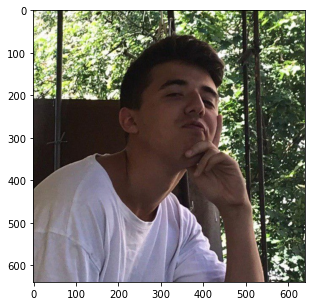

In [2]:
img = cv2.imread('pic.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<matplotlib.axes._subplots.AxesSubplot at 0x22d011c1400>,
 <matplotlib.image.AxesImage at 0x22d04761640>)

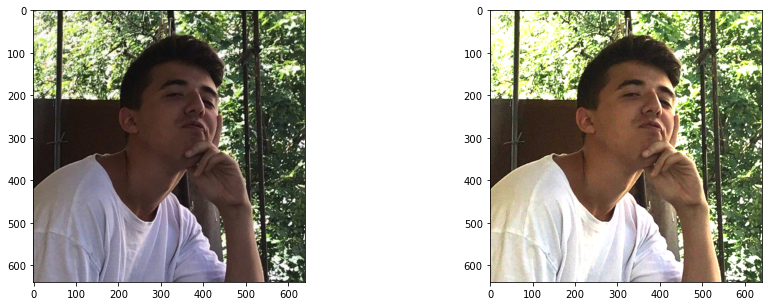

In [10]:
# Define white patch and the coefficients
row, col = 600,100
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

99.76420654296875 96.853046875 86.6190234375


(<matplotlib.axes._subplots.AxesSubplot at 0x22d073a7a60>,
 <matplotlib.image.AxesImage at 0x22d0748aee0>)

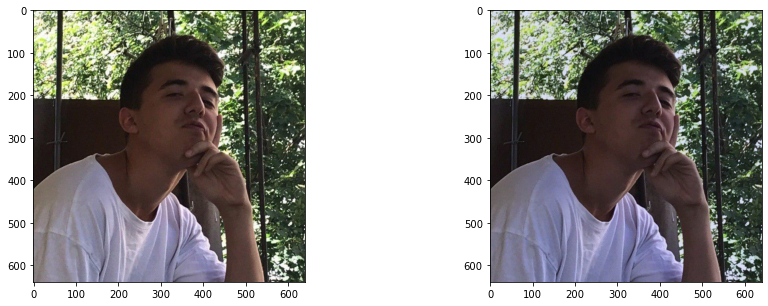

In [55]:
# Load your image
img = cv2.imread('pic.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = img[...,0].mean()
mean_g = img[...,1].mean()
mean_b = img[...,2].mean()
print(mean_r, mean_g, mean_b)
# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
kb = 1
kr = mean_b * kb / mean_r
kg = mean_b * kb / mean_g


# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
coeffs = [kr, kg, kb]

for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]
    
balanced = balanced/255

#Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

234 240 246


(<matplotlib.axes._subplots.AxesSubplot at 0x22d071cf4f0>,
 <matplotlib.image.AxesImage at 0x22d073ef970>)

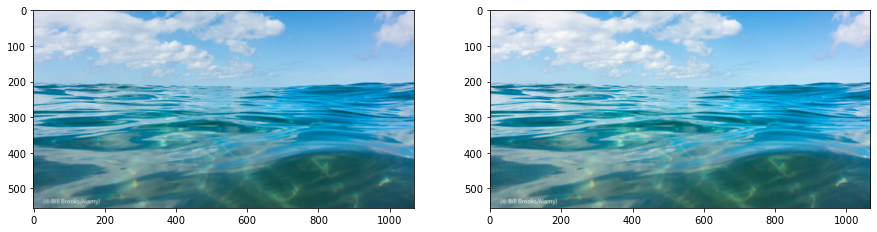

In [54]:
# Load your image
img = cv2.imread('pic3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = img[...,0].max()
max_g = img[...,1].max()
max_b = img[...,2].max()
print(max_r,max_g,max_b)

# Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
coeffs = [max_r, max_g, max_b]

for channel in range(3):
    balanced[..., channel] = img[..., channel] / coeffs[channel]

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)